# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [133]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame


# Display the data table for preview


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
combined_df=pd.merge(study_results, mouse_metadata, on ='Mouse ID', how='left')
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
combined_df.tail()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30
1892,b879,45,72.555239,2,Stelasyn,Female,4,26


In [7]:
# Checking the number of mice.


In [8]:
#checking number of mice
print(len(combined_df['Mouse ID'].unique()))

249


In [9]:
# i found two ways
combined_df['Mouse ID'].nunique()

249

In [10]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
#looking for records that are duplicated inside dataset, 

finding mouse id's that are duplicated. we need to find 

In [12]:
df3 = combined_df.loc[combined_df.duplicated(subset= ['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
print(df3)
# to find which ID was the duplicate value/instance

['g989']


In [13]:
df4=combined_df.loc[combined_df['Mouse ID'] == 'g989']
df4
#display all the data that has the duplicate value.

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [15]:
clean_df = combined_df.drop_duplicates()
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [16]:
# Checking the number of mice in the clean DataFrame.


In [17]:
clean_df['Mouse ID'].nunique()

249

## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


In [19]:
import numpy as np
from scipy.stats import sem

In [20]:
tumor_mean=clean_df.groupby(['Drug Regimen']).mean()
tumor_mean

C:\Users\nasir\AppData\Local\Temp\ipykernel_33004\2489613342.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_mean=clean_df.groupby(['Drug Regimen']).mean()


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Drug Regimen,,,,,
Capomulin,21.565217,40.675741,0.713043,13.456522,19.965217
Ceftamin,19.747191,52.591172,1.179775,13.247191,27.398876
Infubinol,18.174157,52.884795,0.960674,16.230337,27.196629
Ketapril,19.707447,55.235638,1.297872,15.659574,27.861702
Naftisol,19.623656,54.331565,1.182796,12.000000,27.166667
Placebo,18.674033,54.033581,1.441989,10.734807,27.928177
Propriva,16.968750,52.368318,0.981250,10.831250,27.050000
Ramicane,21.425439,40.216745,0.548246,10.684211,19.679825
Stelasyn,19.226519,54.233149,0.872928,12.784530,27.856354


In [49]:
tumor_mean.rename(columns={'Tumor Volume (mm3)': 'Mean Tumor Volume'}, inplace=True)
tumor_mean

,Mean Tumor Volume,Metastatic Sites,Age_months,Weight (g)
Drug Regimen,,,,
Capomulin,40.675741,0.713043,13.456522,19.965217
Ceftamin,52.591172,1.179775,13.247191,27.398876
Infubinol,52.884795,0.960674,16.230337,27.196629
Ketapril,55.235638,1.297872,15.659574,27.861702
Naftisol,54.331565,1.182796,12.000000,27.166667
Placebo,54.033581,1.441989,10.734807,27.928177
Propriva,52.368318,0.981250,10.831250,27.050000
Ramicane,40.216745,0.548246,10.684211,19.679825
Stelasyn,54.233149,0.872928,12.784530,27.856354


In [86]:
tumor_mean.drop(['Metastatic Sites', 'Age_months', 'Weight (g)'],axis=1, inplace=True)
tumor_mean

,Mean Tumor Volume
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.368318
Ramicane,40.216745
Stelasyn,54.233149


In [23]:
tumor_median=clean_df.groupby(['Drug Regimen']).median()
tumor_median

C:\Users\nasir\AppData\Local\Temp\ipykernel_33004\2830045179.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_median=clean_df.groupby(['Drug Regimen']).median()


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Drug Regimen,,,,,
Capomulin,20.0,41.557809,0.0,16.5,20.5
Ceftamin,20.0,51.776157,1.0,12.0,28.0
Infubinol,15.0,51.820584,1.0,20.0,27.0
Ketapril,20.0,53.698743,1.0,18.0,28.0
Naftisol,20.0,52.509285,1.0,9.0,27.0
Placebo,15.0,52.288934,1.0,10.0,28.0
Propriva,15.0,50.909965,1.0,8.0,26.0
Ramicane,20.0,40.673236,0.0,9.0,19.0
Stelasyn,20.0,52.431737,1.0,14.0,28.0


In [51]:
tumor_median.rename(columns={'Tumor Volume (mm3)': 'Median Tumor Volume'}, inplace=True)
tumor_median

,Median Tumor Volume,Metastatic Sites,Age_months,Weight (g)
Drug Regimen,,,,
Capomulin,41.557809,0.0,16.5,20.5
Ceftamin,51.776157,1.0,12.0,28.0
Infubinol,51.820584,1.0,20.0,27.0
Ketapril,53.698743,1.0,18.0,28.0
Naftisol,52.509285,1.0,9.0,27.0
Placebo,52.288934,1.0,10.0,28.0
Propriva,50.909965,1.0,8.0,26.0
Ramicane,40.673236,0.0,9.0,19.0
Stelasyn,52.431737,1.0,14.0,28.0


In [87]:
tumor_median.drop(['Metastatic Sites', 'Age_months', 'Weight (g)'], axis=1, inplace=True)
tumor_median

,Median Tumor Volume
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.909965
Ramicane,40.673236
Stelasyn,52.431737


In [37]:
tumor_variance=clean_df.groupby(['Drug Regimen']).var()
tumor_variance

C:\Users\nasir\AppData\Local\Temp\ipykernel_33004\41515080.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_variance=clean_df.groupby(['Drug Regimen']).var()


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Drug Regimen,,,,,
Capomulin,206.928043,24.947764,0.720790,59.620372,7.466034
Ceftamin,204.031772,39.290177,1.402527,65.147591,2.501016
Infubinol,181.534470,43.128684,1.054942,56.404272,4.769028
Ketapril,196.839089,68.553577,1.942883,36.236432,3.392536
Naftisol,201.208951,66.173479,1.479919,45.102703,2.247748
Placebo,192.954266,61.168083,1.792449,40.384837,3.378146
Propriva,180.848074,42.278090,1.175747,53.046816,2.802516
Ramicane,203.796178,23.486704,0.477838,35.362393,10.465318
Stelasyn,191.620626,59.450562,0.944874,63.036648,2.701473


In [52]:
tumor_variance.rename(columns={'Tumor Volume (mm3)': 'Tumor Vairance'}, inplace=True)
tumor_variance

,Timepoint,Tumor Vairance,Metastatic Sites,Age_months,Weight (g)
Drug Regimen,,,,,
Capomulin,206.928043,24.947764,0.720790,59.620372,7.466034
Ceftamin,204.031772,39.290177,1.402527,65.147591,2.501016
Infubinol,181.534470,43.128684,1.054942,56.404272,4.769028
Ketapril,196.839089,68.553577,1.942883,36.236432,3.392536
Naftisol,201.208951,66.173479,1.479919,45.102703,2.247748
Placebo,192.954266,61.168083,1.792449,40.384837,3.378146
Propriva,180.848074,42.278090,1.175747,53.046816,2.802516
Ramicane,203.796178,23.486704,0.477838,35.362393,10.465318
Stelasyn,191.620626,59.450562,0.944874,63.036648,2.701473


In [89]:
tumor_variance.drop(['Metastatic Sites','Age_months', 'Weight (g)'], axis=1, inplace=True)

In [90]:
tumor_variance

,Tumor Vairance
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,42.278090
Ramicane,23.486704
Stelasyn,59.450562


In [59]:
stand_dev=clean_df.groupby(['Drug Regimen']).std()
stand_dev

C:\Users\nasir\AppData\Local\Temp\ipykernel_33004\359117109.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stand_dev=clean_df.groupby(['Drug Regimen']).std()


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Drug Regimen,,,,,
Capomulin,14.384994,4.994774,0.848993,7.721423,2.732404
Ceftamin,14.283969,6.268188,1.184283,8.071406,1.581460
Infubinol,13.473473,6.567243,1.027104,7.510278,2.183810
Ketapril,14.029935,8.279709,1.393873,6.019670,1.841884
Naftisol,14.184814,8.134708,1.216519,6.715855,1.499249
Placebo,13.890798,7.821003,1.338824,6.354907,1.837973
Propriva,13.447977,6.502160,1.084319,7.283325,1.674072
Ramicane,14.275720,4.846308,0.691259,5.946629,3.235014
Stelasyn,13.842710,7.710419,0.972046,7.939562,1.643616


In [63]:
stand_dev.columns

Index(['Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Age_months',
       'Weight (g)'],
      dtype='object')

In [64]:
stand_dev.rename(columns={'Tumor Volume (mm3)': 'Standard Deviation of Tumor Volumes'}, inplace = True)
stand_dev

,Timepoint,Standard Deviation of Tumor Volumes,Metastatic Sites,Age_months,Weight (g)
Drug Regimen,,,,,
Capomulin,14.384994,4.994774,0.848993,7.721423,2.732404
Ceftamin,14.283969,6.268188,1.184283,8.071406,1.581460
Infubinol,13.473473,6.567243,1.027104,7.510278,2.183810
Ketapril,14.029935,8.279709,1.393873,6.019670,1.841884
Naftisol,14.184814,8.134708,1.216519,6.715855,1.499249
Placebo,13.890798,7.821003,1.338824,6.354907,1.837973
Propriva,13.447977,6.502160,1.084319,7.283325,1.674072
Ramicane,14.275720,4.846308,0.691259,5.946629,3.235014
Stelasyn,13.842710,7.710419,0.972046,7.939562,1.643616


In [92]:
stand_dev.drop(['Metastatic Sites', 'Age_months','Weight (g)'], axis=1, inplace= True)
stand_dev

,Standard Deviation of Tumor Volumes
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.502160
Ramicane,4.846308
Stelasyn,7.710419


In [97]:
summary1=tumor_mean.merge(tumor_median, on = ['Drug Regimen'])
summary1


,Mean Tumor Volume,Median Tumor Volume
Drug Regimen,,
Capomulin,40.675741,41.557809
Ceftamin,52.591172,51.776157
Infubinol,52.884795,51.820584
Ketapril,55.235638,53.698743
Naftisol,54.331565,52.509285
Placebo,54.033581,52.288934
Propriva,52.368318,50.909965
Ramicane,40.216745,40.673236
Stelasyn,54.233149,52.431737


In [98]:
summary2=summary1.merge(tumor_variance, on = ['Drug Regimen'])
summary2

,Mean Tumor Volume,Median Tumor Volume,Tumor Vairance
Drug Regimen,,,
Capomulin,40.675741,41.557809,24.947764
Ceftamin,52.591172,51.776157,39.290177
Infubinol,52.884795,51.820584,43.128684
Ketapril,55.235638,53.698743,68.553577
Naftisol,54.331565,52.509285,66.173479
Placebo,54.033581,52.288934,61.168083
Propriva,52.368318,50.909965,42.278090
Ramicane,40.216745,40.673236,23.486704
Stelasyn,54.233149,52.431737,59.450562


In [99]:
summary3 = summary2.merge(stand_dev, on = ['Drug Regimen'])
summary3

,Mean Tumor Volume,Median Tumor Volume,Tumor Vairance,Standard Deviation of Tumor Volumes
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.368318,50.909965,42.278090,6.502160
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


In [25]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [106]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar=clean_df[['Mouse ID', 'Timepoint']]
bar.set_index('Mouse ID')

,Timepoint
Mouse ID,
b128,0
f932,0
g107,0
a457,0
c819,0
...,...
r944,45
u364,45
p438,45


<Axes: >

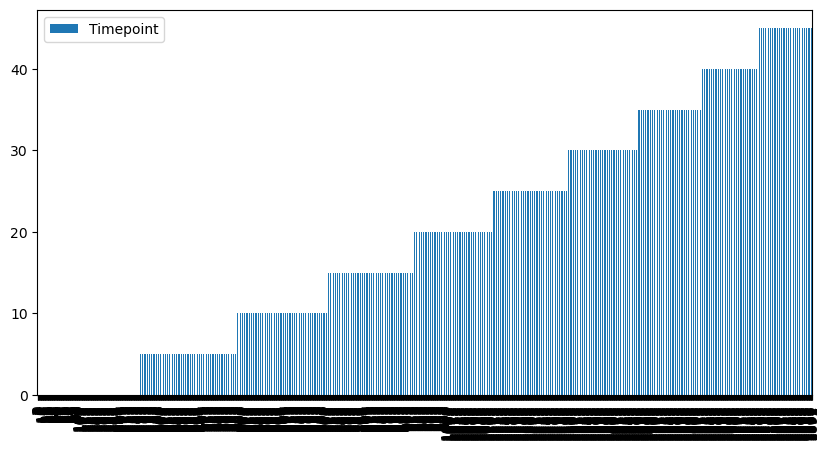

In [109]:
bar.plot(kind='bar', figsize=(10,5))

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


In [28]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


In [110]:
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [113]:
male= len(clean_df['Sex']=='Male')

In [114]:
female = len(clean_df['Sex']=='Female')

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [31]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [32]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [134]:
import numpy as np

In [135]:
one_mouse = clean_df.loc[clean_df['Drug Regimen']=='Capomulin']
one_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,b128,0,45.000000,0,Capomulin,Female,21,21
227,b128,0,45.000000,0,Capomulin,Female,8,17
228,b128,0,45.000000,0,Capomulin,Female,3,17
229,b128,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,b128,45,40.728578,1,Capomulin,Female,1,23
1859,b128,45,38.125164,1,Capomulin,Female,7,23
1878,b128,45,47.685963,1,Capomulin,Female,1,24
1888,b128,45,41.581521,2,Capomulin,Male,12,25


In [140]:
one_mouse2= one_mouse[['Timepoint', 'Tumor Volume (mm3)']]
one_mouse2


,Timepoint,Tumor Volume (mm3)
0,0,45.000000
226,0,45.000000
227,0,45.000000
228,0,45.000000
229,0,45.000000
...,...,...
1854,45,40.728578
1859,45,38.125164
1878,45,47.685963
1888,45,41.581521


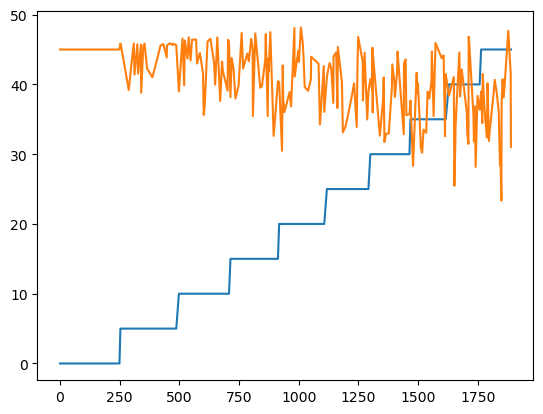

In [141]:
plt.plot(one_mouse2)


In [124]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


0

In [142]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
one_mouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,b128,0,45.0,0,Capomulin,Female,21,21
227,b128,0,45.0,0,Capomulin,Female,8,17
228,b128,0,45.0,0,Capomulin,Female,3,17
229,b128,0,45.0,0,Capomulin,Male,7,21


In [144]:
one_mouse.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [145]:
one_mouse[['Weight (g)', 'Tumor Volume (mm3)']]

,Weight (g),Tumor Volume (mm3)
0,22,45.000000
226,21,45.000000
227,17,45.000000
228,17,45.000000
229,21,45.000000
...,...,...
1854,23,40.728578
1859,23,38.125164
1878,24,47.685963
1888,25,41.581521


In [151]:
x_val = one_mouse['Weight (g)']
x_val

0       22
226     21
227     17
228     17
229     21
        ..
1854    23
1859    23
1878    24
1888    25
1889    17
Name: Weight (g), Length: 230, dtype: int64

In [152]:
y_val=one_mouse['Tumor Volume (mm3)']

Text(0.5, 1.0, 'Weight vs Tumor Volume')

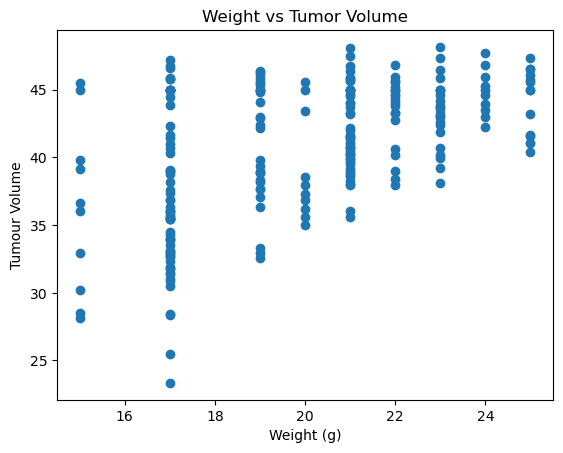

In [154]:
plt.scatter(x_val, y_val)
plt.xlabel('Weight (g)')
plt.ylabel('Tumour Volume')
plt.title('Weight vs Tumor Volume')

## Correlation and Regression

In [35]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


In [156]:
from scipy.stats import linregress

In [157]:
linregress(x_val, y_val)

LinregressResult(slope=0.9609669432428355, intercept=21.489827213299566, rvalue=0.5256995552077169, pvalue=9.605446629501521e-18, stderr=0.10298279892023657, intercept_stderr=2.075157005491298)

In [159]:
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_val, y_val)

In [160]:
slope

0.9609669432428355

In [161]:
intercept

21.489827213299566

In [162]:
regress_val= x_val*slope+intercept